<a href="https://colab.research.google.com/github/YuelianLi/Math-152/blob/main/NB5revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Challenge 1

If $N$ is a positive integer, then $r_3(N)$ is the number of ways that $N$ can be expressed as the sum of three squares.  Order and sign matter, so for example
$$6 = 1^2 + 1^2 + 2^2 = (-1)^2 + 1^2 + 2^2 = 2^2 + (-1)^2 + (-1)^2 = \cdots$$
These are all different ways of expressing 6 as the sum of three squares.  In fact, $r_3(6) = 8 \cdot 3 = 24$.  The 8 comes from the fact that there are eight sign-choices, and the 3 comes from the three orderings (1,1,2) and (1,2,1) and (2,1,1).

In other words, $r_3(N)$ is the number of elements in the following set:
$$\{ (a,b,c) \in {\mathbb Z}^3 : a^2 + b^2 + c^2 = N \}.$$

Write a function that computes $r_3(N)$ as efficiently as you can, for somewhat large values of $N$ (e.g., $N \approx 1000$).

You can check whether your function is behaving correctly, by comparing to the values found at the [Online Encyclopedia of Integer Sequences](https://oeis.org/A005875).

###The revised code:

If you only allow students to revise the homework instead of writing a new one(?)

In [157]:
import numpy as np
def rep_three(N):
  abc = list()
  for a in range(0,int(np.sqrt(N))+1):
    for b in range(a,int(np.sqrt(N))+1):
      for c in range(b,int(np.sqrt(N))+1):
        if a**2 + b**2 + c**2 == N:
          abc.append((a,b,c))

#print(abcs)
  R = 0
  for n in abc:
    if (n[0] == 0) & (n[1] == 0) & (n[2] == 0):
      R += 1
    elif (n[0] == n[1] == 0) | (n[1] == n[2] == 0) | (n[0] == n[2] == 0):
      R += 2
    elif (n[0] == 0) | (n[1] == 0) | (n[2] == 0):
      R += 4
    else:
      R += 8

  return R, abc # The result of your function should be R.

In [158]:
rep_three(6)

(8, [(1, 1, 2)])

In [159]:
rep_three(100)

(6, [(0, 0, 10), (0, 6, 8)])

In [160]:
%timeit(rep_three(100))

The slowest run took 5.27 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 326 µs per loop


In [161]:
rep_three(1000)

(24, [(0, 10, 30), (0, 18, 26), (6, 8, 30), (10, 18, 24)])

In [162]:
%timeit(rep_three(1000))

100 loops, best of 5: 5.35 ms per loop


###The new code:

In [226]:
import numpy as np
def rep_three(N):
  abc = list()
  R=0
  for a in range(-int(np.sqrt(N)), int(np.sqrt(N))+1):
    for b in range(-int(np.sqrt(N-abs(a))),int(np.sqrt(N-abs(a)))+1):
      for c in range(-int(np.sqrt(N-abs(a)-abs(b))),int(np.sqrt(N-abs(a)-abs(a)))+1):
        if a**2 + b**2 + c**2 == N:
          abc.append((a,b,c))
          R+=1

  return R, abc # The result of your function should be R.

In [227]:
rep_three(6)

(24,
 [(-2, -1, -1),
  (-2, -1, 1),
  (-2, 1, -1),
  (-2, 1, 1),
  (-1, -2, -1),
  (-1, -2, 1),
  (-1, -1, -2),
  (-1, -1, 2),
  (-1, 1, -2),
  (-1, 1, 2),
  (-1, 2, -1),
  (-1, 2, 1),
  (1, -2, -1),
  (1, -2, 1),
  (1, -1, -2),
  (1, -1, 2),
  (1, 1, -2),
  (1, 1, 2),
  (1, 2, -1),
  (1, 2, 1),
  (2, -1, -1),
  (2, -1, 1),
  (2, 1, -1),
  (2, 1, 1)])

In [228]:
rep_three(100)

(30,
 [(-10, 0, 0),
  (-8, -6, 0),
  (-8, 0, -6),
  (-8, 0, 6),
  (-8, 6, 0),
  (-6, -8, 0),
  (-6, 0, -8),
  (-6, 0, 8),
  (-6, 8, 0),
  (0, -10, 0),
  (0, -8, -6),
  (0, -8, 6),
  (0, -6, -8),
  (0, -6, 8),
  (0, 0, -10),
  (0, 0, 10),
  (0, 6, -8),
  (0, 6, 8),
  (0, 8, -6),
  (0, 8, 6),
  (0, 10, 0),
  (6, -8, 0),
  (6, 0, -8),
  (6, 0, 8),
  (6, 8, 0),
  (8, -6, 0),
  (8, 0, -6),
  (8, 0, 6),
  (8, 6, 0),
  (10, 0, 0)])

In [229]:
%timeit(rep_three(100))

100 loops, best of 5: 6.79 ms per loop


In [230]:
rep_three(1000)

(144,
 [(-30, -10, 0),
  (-30, -8, -6),
  (-30, -8, 6),
  (-30, -6, -8),
  (-30, -6, 8),
  (-30, 0, -10),
  (-30, 0, 10),
  (-30, 6, -8),
  (-30, 6, 8),
  (-30, 8, -6),
  (-30, 8, 6),
  (-30, 10, 0),
  (-26, -18, 0),
  (-26, 0, -18),
  (-26, 0, 18),
  (-26, 18, 0),
  (-24, -18, -10),
  (-24, -18, 10),
  (-24, -10, -18),
  (-24, -10, 18),
  (-24, 10, -18),
  (-24, 10, 18),
  (-24, 18, -10),
  (-24, 18, 10),
  (-18, -26, 0),
  (-18, -24, -10),
  (-18, -24, 10),
  (-18, -10, -24),
  (-18, -10, 24),
  (-18, 0, -26),
  (-18, 0, 26),
  (-18, 10, -24),
  (-18, 10, 24),
  (-18, 24, -10),
  (-18, 24, 10),
  (-18, 26, 0),
  (-10, -30, 0),
  (-10, -24, -18),
  (-10, -24, 18),
  (-10, -18, -24),
  (-10, -18, 24),
  (-10, 0, -30),
  (-10, 0, 30),
  (-10, 18, -24),
  (-10, 18, 24),
  (-10, 24, -18),
  (-10, 24, 18),
  (-10, 30, 0),
  (-8, -30, -6),
  (-8, -30, 6),
  (-8, -6, -30),
  (-8, -6, 30),
  (-8, 6, -30),
  (-8, 6, 30),
  (-8, 30, -6),
  (-8, 30, 6),
  (-6, -30, -8),
  (-6, -30, 8),
  (-6, -8

In [231]:
%timeit(rep_three(1000))

1 loop, best of 5: 201 ms per loop


###The third code(if you donnot like the second code either):

rep_three(100) is faster than the second code, but rep_three(1000) has more loops than the second code.

In [233]:
import numpy as np
def rep_three(N):
  abc = list()
  R=0
  for a in range(-int(np.sqrt(N)), int(np.sqrt(N))+1):
    for b in range(-int(np.sqrt(N-a**2)),int(np.sqrt(N-a**2))+1):
      for c in range(-int(np.sqrt(N-a**2-b**2)),int(np.sqrt(N-a**2-b**2))+1):
        if a**2 + b**2 + c**2 == N:
          abc.append((a,b,c))
          R+=1

  return R, abc # The result of your function should be R.

In [234]:
rep_three(100)

(30,
 [(-10, 0, 0),
  (-8, -6, 0),
  (-8, 0, -6),
  (-8, 0, 6),
  (-8, 6, 0),
  (-6, -8, 0),
  (-6, 0, -8),
  (-6, 0, 8),
  (-6, 8, 0),
  (0, -10, 0),
  (0, -8, -6),
  (0, -8, 6),
  (0, -6, -8),
  (0, -6, 8),
  (0, 0, -10),
  (0, 0, 10),
  (0, 6, -8),
  (0, 6, 8),
  (0, 8, -6),
  (0, 8, 6),
  (0, 10, 0),
  (6, -8, 0),
  (6, 0, -8),
  (6, 0, 8),
  (6, 8, 0),
  (8, -6, 0),
  (8, 0, -6),
  (8, 0, 6),
  (8, 6, 0),
  (10, 0, 0)])

In [235]:
%timeit(rep_three(100))

100 loops, best of 5: 4.27 ms per loop


In [236]:
rep_three(1000)

(144,
 [(-30, -10, 0),
  (-30, -8, -6),
  (-30, -8, 6),
  (-30, -6, -8),
  (-30, -6, 8),
  (-30, 0, -10),
  (-30, 0, 10),
  (-30, 6, -8),
  (-30, 6, 8),
  (-30, 8, -6),
  (-30, 8, 6),
  (-30, 10, 0),
  (-26, -18, 0),
  (-26, 0, -18),
  (-26, 0, 18),
  (-26, 18, 0),
  (-24, -18, -10),
  (-24, -18, 10),
  (-24, -10, -18),
  (-24, -10, 18),
  (-24, 10, -18),
  (-24, 10, 18),
  (-24, 18, -10),
  (-24, 18, 10),
  (-18, -26, 0),
  (-18, -24, -10),
  (-18, -24, 10),
  (-18, -10, -24),
  (-18, -10, 24),
  (-18, 0, -26),
  (-18, 0, 26),
  (-18, 10, -24),
  (-18, 10, 24),
  (-18, 24, -10),
  (-18, 24, 10),
  (-18, 26, 0),
  (-10, -30, 0),
  (-10, -24, -18),
  (-10, -24, 18),
  (-10, -18, -24),
  (-10, -18, 24),
  (-10, 0, -30),
  (-10, 0, 30),
  (-10, 18, -24),
  (-10, 18, 24),
  (-10, 24, -18),
  (-10, 24, 18),
  (-10, 30, 0),
  (-8, -30, -6),
  (-8, -30, 6),
  (-8, -6, -30),
  (-8, -6, 30),
  (-8, 6, -30),
  (-8, 6, 30),
  (-8, 30, -6),
  (-8, 30, 6),
  (-6, -30, -8),
  (-6, -30, 8),
  (-6, -8

In [237]:
%timeit(rep_three(1000))

10 loops, best of 5: 112 ms per loop


# Challenge 4

Pascal's triangle has $1$ in the first row, then $1, 1$ in the second rod, then $1,2,1$ in the third row, etc.  One can place these numbers in a triangle, with "rows" as diagonals, as drawn below.

1 1 1 1 1 1

1 2 3 4 5

1 3 6 10

1 4 10

1 5

1

Et cetera.

Turn these numbers into black and white dots, depending on whether they are even (black) or odd (white).  This produces an image like the following:

X X X X X X

X O X O X

X X O O

X O O

X X

X

Now perform this in PIL, to create an image that fills the top-left triangle in an image of at least 200 x 200 pixels.  You should *not* be computing giant numbers like 200 factorial!  Each row of Pascal's triangle can be computed from the previous by addition... and you can perform this "mod 2" all the way through.

Extra fun:  instead of black/white dots for even/odd, try colors based on remainders after dividing by three, by four, etc.


###The revised code:

In [112]:
import numpy as np

In [113]:
def Pascal_triangle(N) :
  Pascal = np.zeros((N,N))
  Pascal[0,:] = np.array([1]*N)
  for row in range(1,N):
    Pascal[row,0] = 1 # Set first column-value to 1.
    n = N-1 - row
    for column in range(1,n):
      Pascal[row,column] = Pascal[row-1,column] + Pascal[row, column-1]

  return Pascal
print(Pascal.astype(np.uint64))

[[ 1  1  1  1  1  1  1  1  1  1]
 [ 1  2  3  4  5  6  7  8  0  0]
 [ 1  3  6 10 15 21 28  0  0  0]
 [ 1  4 10 20 35 56  0  0  0  0]
 [ 1  5 15 35 70  0  0  0  0  0]
 [ 1  6 21 56  0  0  0  0  0  0]
 [ 1  7 28  0  0  0  0  0  0  0]
 [ 1  8  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]]


In [114]:
from PIL import Image

In [116]:
def Pascal_triangle(N, mod):
    Pascal = np.zeros((N, N))
    Pascal[0, :] = np.array([1]*N)
    for row in range(1, N):
        Pascal[row, 0] = 1  # Set first column-value to 1.
        n = N - 1 - row
        for column in range(1, n):
            Pascal[row, column] = (Pascal[row-1, column] + Pascal[row, column-1])%mod
    return Pascal

In [118]:
def triangle_array(N, mod=2, A=True):
    if A == True:
        A = Pascal_triangle(N, mod)
        A = A*257
    image_triangle = Image.fromarray(A)
    image_triangle = image_triangle.convert('RGB')
    #this time i used this thing, since you required the rest of the place to be triangle instead of being omitted.
    #if i use display, it cannot write mode F as PNG, but if i use image_array = image_array.astype(np.uint8) as last time i did,
    #i will only omit a lot of numbers in the middle of the triangle.
    #The default image mode is F. The pixel value required by F is a floating point number of 0-1, which is now a number of 0-257 and then converted to rgb, which can support 0-257
    display(image_triangle)
    #image_triangle.show()

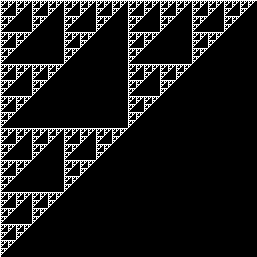

In [119]:
triangle_array(257)

###The new code for extra fun:

In [125]:
import numpy as np

In [120]:
from PIL import Image 

In [122]:
def Pascal_triangle(N, mod):
    Pascal = np.zeros((N, N))
    Pascal[0, :] = np.array([1]*N)
    for row in range(1, N):
        Pascal[row, 0] = 1  # Set first column-value to 1.
        n = N - 1 - row
        for column in range(1, n):
            Pascal[row, column] = (Pascal[row-1, column] + Pascal[row, column-1])%mod
    return Pascal

In [123]:
def colored_triangle_array(N, mod=2, A=True):
    RGB = 255
    if A == True:
        A = Pascal_triangle(N, mod)
        B = np.ones((N, N, 3), dtype=np.uint8)
        for i in range(0,N):
          for j in range(0,N):
            if A[i,j] != 0:
                temp = RGB / A[i,j]
                B[i,j] = [RGB - temp, temp,temp / 2] #setting up digt color based on modded number in A
            
            else:
                B[i,j] = [0,0,0]
            
    image_triangle = Image.fromarray(B)
    display(image_triangle)

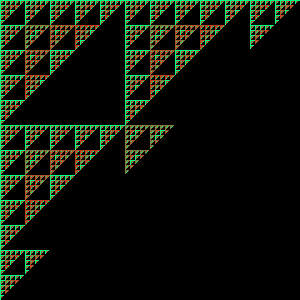

In [124]:
colored_triangle_array(300,5)